# 2016 Trump Vote: Demographics, Attitudes, and Influences

<table>
  <thead>
    <tr>
      <th>Column</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>uid</td>
      <td>Numeric vector, a unique identifier for the respondent as they first appear in the CCES data.</td>
    </tr>
    <tr>
      <td>state</td>
      <td>Character vector for the state in which the respondent resides.</td>
    </tr>
    <tr>
      <td>votetrump</td>
      <td>Numeric that equals 1 if the respondent says s/he voted for Trump in 2016.</td>
    </tr>
    <tr>
      <td>age</td>
      <td>Numeric vector for age, roughly calculated as 2016 - birthyr from the CCES data.</td>
    </tr>
    <tr>
      <td>female</td>
      <td>Numeric that equals 1 if the respondent is a woman.</td>
    </tr>
    <tr>
      <td>collegeed</td>
      <td>Numeric vector that equals 1 if the respondent says s/he has a college degree.</td>
    </tr>
    <tr>
      <td>racef</td>
      <td>Character vector for the race of the respondent.</td>
    </tr>
    <tr>
      <td>famincr</td>
      <td>Numeric vector for the respondent's household income, ranging from 1 (Less than $10,000) to 12 ($150,000 or more).</td>
    </tr>
    <tr>
      <td>ideo</td>
      <td>Numeric vector for the respondent's ideology on a liberal-conservative discrete scale. 1 = very liberal, 5 = very conservative.</td>
    </tr>
    <tr>
      <td>pid7na</td>
      <td>Numeric vector for the respondent's partisanship on the 1-7 scale. 1 = Strong Democrat, 7 = Strong Republican. Other party supporters are coded as NA.</td>
    </tr>
    <tr>
      <td>bornagain</td>
      <td>Numeric vector for whether the respondent self-identifies as a born-again Christian.</td>
    </tr>
    <tr>
      <td>religimp</td>
      <td>Numeric vector for the importance of religion to the respondent. 1 = not at all important, 4 = very important.</td>
    </tr>
    <tr>
      <td>churchatd</td>
      <td>Numeric vector for the extent of church attendance for the respondent. 1 = never, 6 = more than once a week.</td>
    </tr>
    <tr>
      <td>prayerfreq</td>
      <td>Numeric vector for the frequency of prayer for the respondent. 1 = never, 7 = several times a day.</td>
    </tr>
    <tr>
      <td>angryracism</td>
      <td>Numeric vector for how angry the respondent is that racism exists. 1 = strongly agree, 5 = strongly disagree.</td>
    </tr>
    <tr>
      <td>whiteadv</td>
      <td>Numeric vector for agreement with the statement that white people have advantages over others in the U.S. 1 = strongly agree, 5 = strongly disagree.</td>
    </tr>
    <tr>
      <td>fearraces</td>
      <td>Numeric vector for agreement with the statement that the respondent fears other races. 1 = strongly disagree, 5 = strongly agree.</td>
    </tr>
    <tr>
      <td>racerare</td>
      <td>Numeric vector for agreement with the statement that racism is rare in the U.S. 1 = strongly disagree, 5 = strongly agree.</td>
    </tr>
    <tr>
      <td>lrelig</td>
      <td>Numeric vector serving as a latent estimate for religiosity from bornagain, religimp, churchatd, and prayerfreq variables. Higher values = more religiosity.</td>
    </tr>
    <tr>
      <td>lcograc</td>
      <td>Numeric vector serving as a latent estimate for cognitive racism, derived from racerare and whiteadv variables.</td>
    </tr>
    <tr>
      <td>lemprac</td>
      <td>Numeric vector serving as a latent estimate for empathetic racism, derived from fearraces and angryracism variables.</td>
    </tr>
  </tbody>
</table>


## Import lib and dataset

In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/the-individual-correlates-of-the-trump-vote/TV16.csv')
df.dropna(inplace = True)
df.head()

,rownames,uid,state,votetrump,age,female,collegeed,racef,famincr,ideo,...,religimp,churchatd,prayerfreq,angryracism,whiteadv,fearraces,racerare,lrelig,lcograc,lemprac
4,5,5,Colorado,0.0,34,1,1,White,7.0,2.0,...,1.0,1.0,2.0,2.0,1.0,1.0,1.0,-1.130175,-1.204085,-0.138715
6,7,7,Texas,1.0,54,0,0,White,3.0,5.0,...,4.0,5.0,7.0,2.0,5.0,2.0,2.0,1.171097,0.508762,0.204095
8,9,9,Georgia,1.0,53,0,0,White,4.0,4.0,...,2.0,3.0,6.0,3.0,4.0,1.0,2.0,-0.263387,0.301278,0.070166
9,10,10,Pennsylvania,1.0,59,1,0,White,7.0,3.0,...,3.0,2.0,4.0,3.0,5.0,1.0,3.0,-0.066305,0.900038,0.070166
10,11,11,Hawaii,0.0,70,1,1,Asian,10.0,3.0,...,2.0,2.0,3.0,1.0,2.0,3.0,2.0,-0.465141,-0.118812,0.052228


## Gender Distribution of Trump and Non-Trump Voters

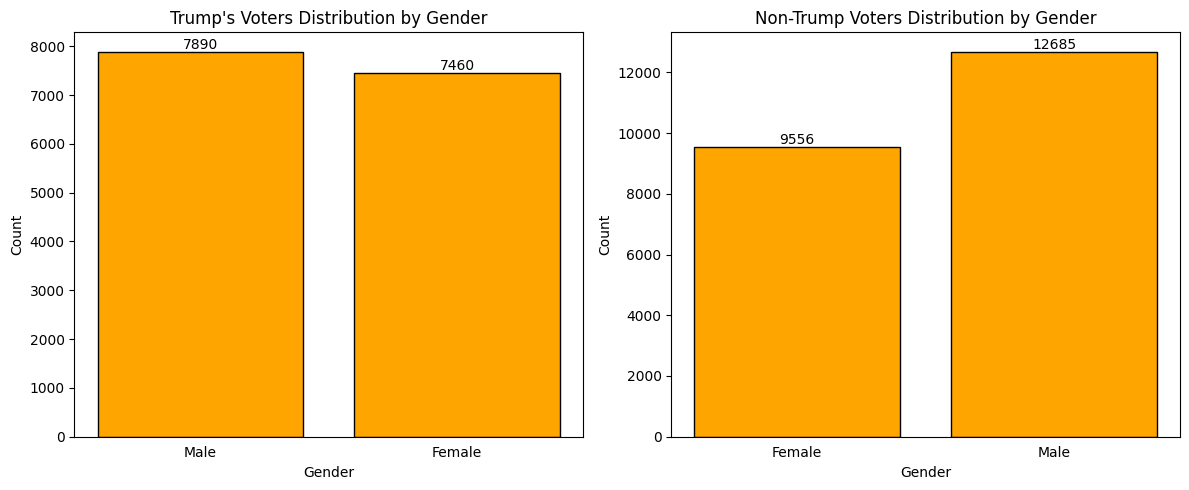

In [2]:
trump_voters = df[df['votetrump'] == 1.0]
non_trump_voters = df[df['votetrump'] == 0.0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df_trump_counts = trump_voters['female'].value_counts()
bars_trump = axes[0].bar(df_trump_counts.index, df_trump_counts.values, color='orange', edgecolor='black')

axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title("Trump's Voters Distribution by Gender")
axes[0].set_xticks(df_trump_counts.index)
axes[0].set_xticklabels(['Male', 'Female'])
axes[0].tick_params(axis='x', which='both', bottom=False, top=False)

for bar in bars_trump:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

df_non_trump_counts = non_trump_voters['female'].value_counts()
bars_non_trump = axes[1].bar(df_non_trump_counts.index, df_non_trump_counts.values, color='orange', edgecolor='black')

axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Count')
axes[1].set_title("Non-Trump Voters Distribution by Gender")
axes[1].set_xticks(df_non_trump_counts.index)
axes[1].set_xticklabels(['Male', 'Female'])
axes[1].tick_params(axis='x', which='both', bottom=False, top=False)

for bar in bars_non_trump:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Age Distribution by Trump Vote

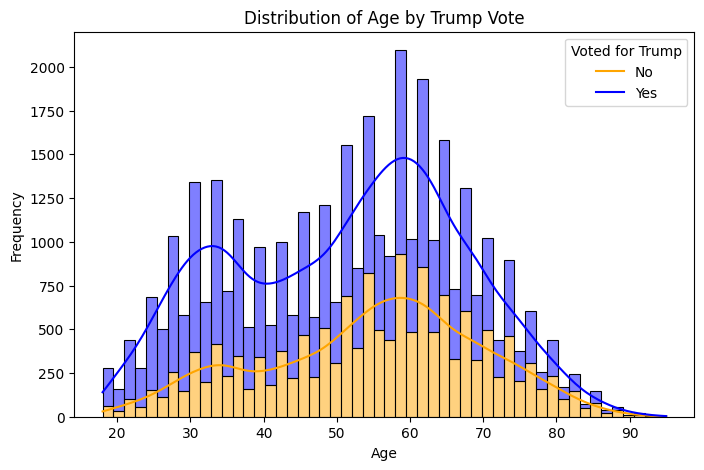

In [3]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', kde=True, hue='votetrump', multiple='stack', palette={0: 'blue', 1: 'orange'}, edgecolor='black')

plt.title('Distribution of Age by Trump Vote')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Voted for Trump', labels=['No', 'Yes'])

plt.show()

## Ideological Distribution

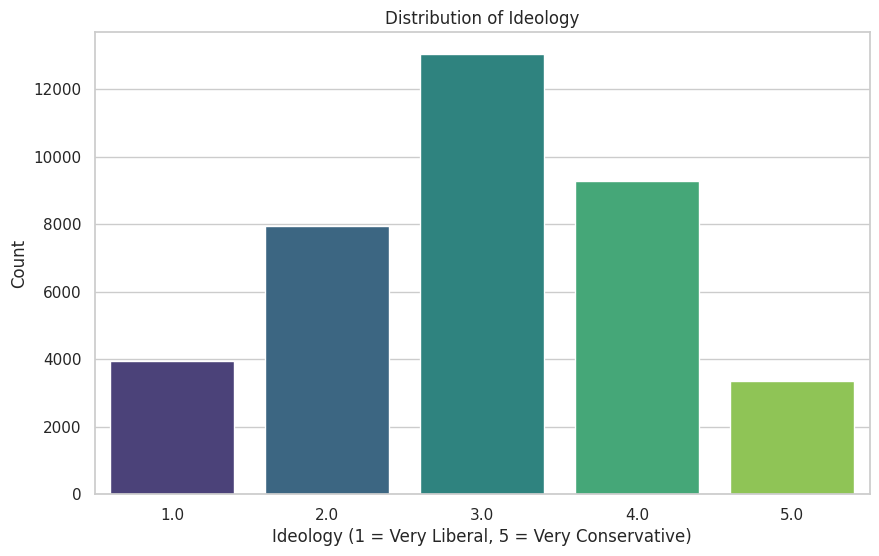

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='ideo', data=df, palette='viridis')
plt.xlabel('Ideology (1 = Very Liberal, 5 = Very Conservative)')
plt.ylabel('Count')
plt.title('Distribution of Ideology')
plt.show()

## Geographic Distribution of Survey Respondents

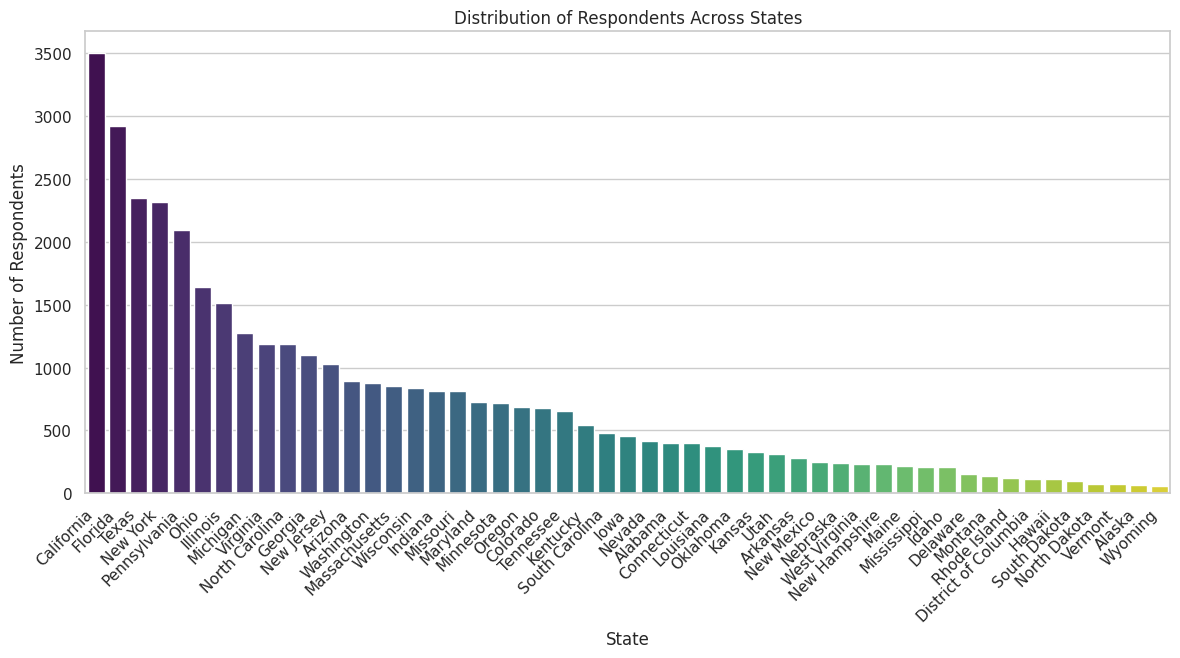

In [5]:
state_counts = df['state'].value_counts()

plt.figure(figsize=(14, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Distribution of Respondents Across States')
plt.xlabel('State')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.show()

## Demographic Distribution: Respondents by Race

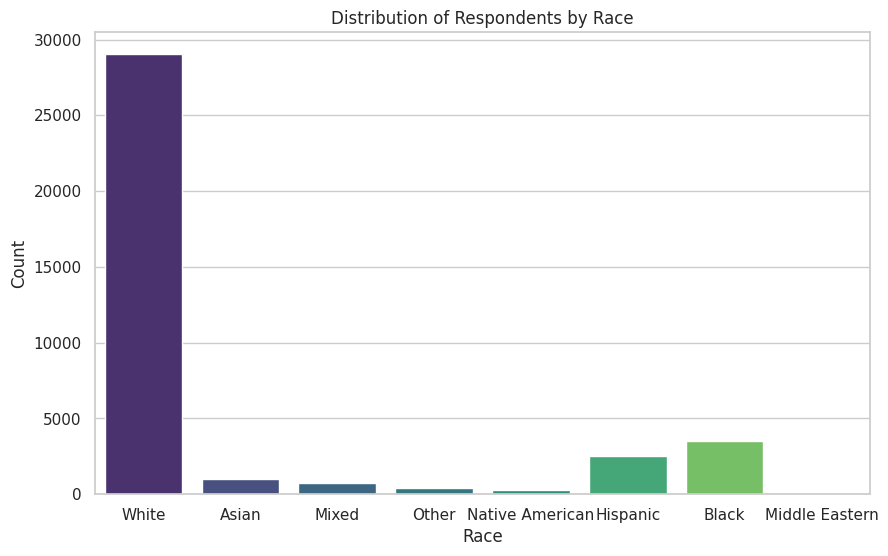

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(x='racef', data=df, palette='viridis')
plt.title('Distribution of Respondents by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

## Distribution of College Education Among Survey Respondents

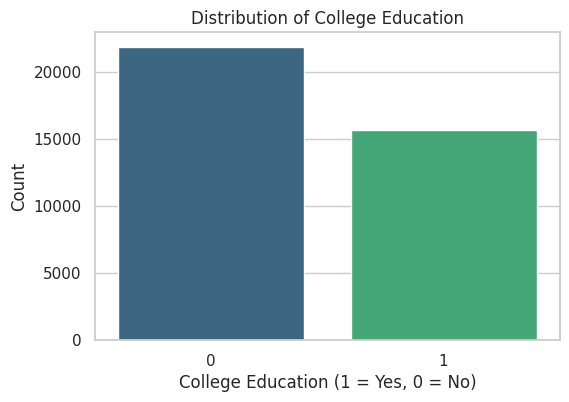

In [7]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='collegeed', data=df, palette='viridis')
plt.xlabel('College Education (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.title('Distribution of College Education')
plt.show()

## Distribution of Household Income Categories

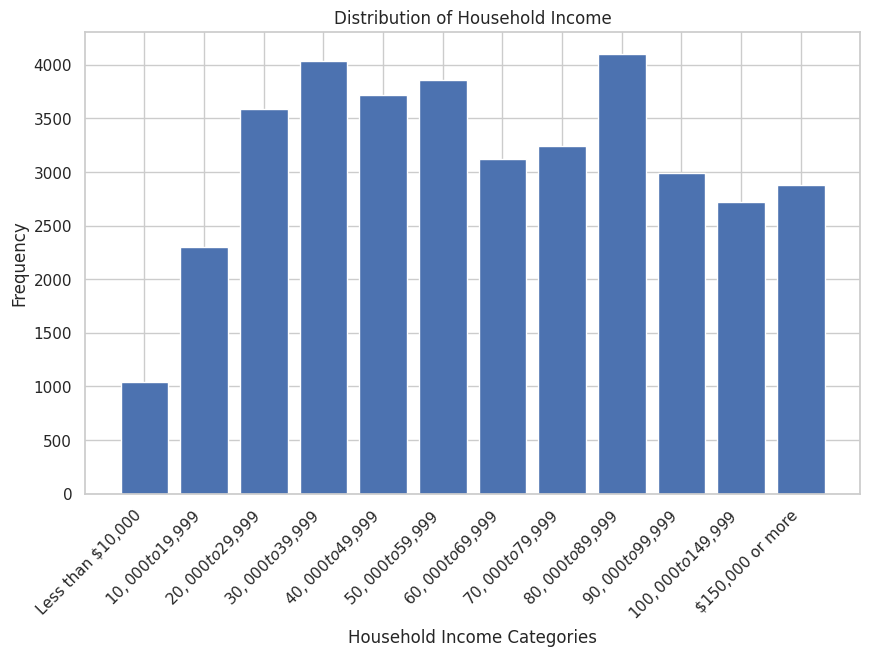

In [8]:
income_categories = [
    "Less than $10,000",
    "$10,000 to $19,999",
    "$20,000 to $29,999",
    "$30,000 to $39,999",
    "$40,000 to $49,999",
    "$50,000 to $59,999",
    "$60,000 to $69,999",
    "$70,000 to $79,999",
    "$80,000 to $89,999",
    "$90,000 to $99,999",
    "$100,000 to $149,999",
    "$150,000 or more"
]

plt.figure(figsize=(10, 6))
plt.hist(df['famincr'], bins=range(1, 14), align='left', rwidth=0.8)
plt.xlabel('Household Income Categories')
plt.ylabel('Frequency')
plt.title('Distribution of Household Income')
plt.xticks(range(1, 14), income_categories + [''], rotation=45, ha='right')
plt.show()

## Distribution of Partisanship Among Survey Respondents

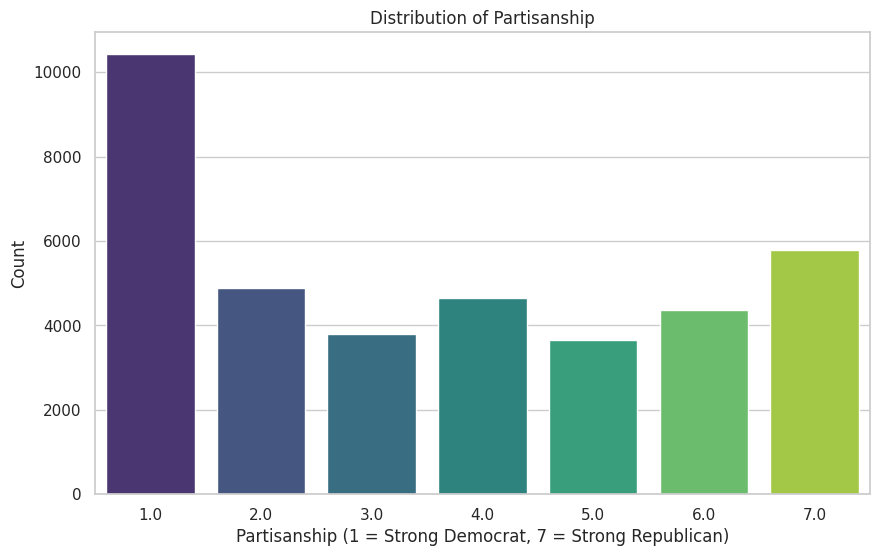

In [9]:
df_partisanship = df.dropna(subset=['pid7na'])
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='pid7na', data=df_partisanship, palette='viridis')

plt.xlabel('Partisanship (1 = Strong Democrat, 7 = Strong Republican)')
plt.ylabel('Count')
plt.title('Distribution of Partisanship')
plt.show()

## Distribution of Born-Again Christians

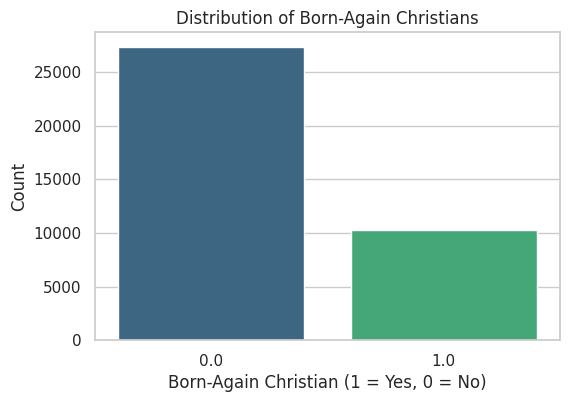

In [10]:
df_bornagain = df.dropna(subset=['bornagain'])

plt.figure(figsize=(6, 4))
sns.countplot(x='bornagain', data=df_bornagain, palette='viridis')
plt.title('Distribution of Born-Again Christians')
plt.xlabel('Born-Again Christian (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

## Distribution of Importance of Religion among Respondents

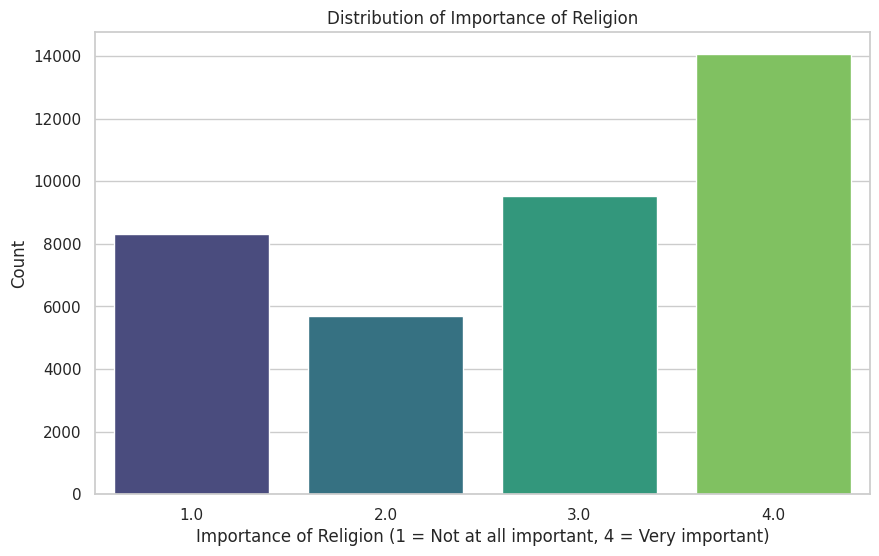

In [11]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='religimp', data=df, palette='viridis')
plt.title('Distribution of Importance of Religion')
plt.xlabel('Importance of Religion (1 = Not at all important, 4 = Very important)')
plt.ylabel('Count')
plt.show()

## Perception of Racism Rarity in the U.S. - Distribution Analysis

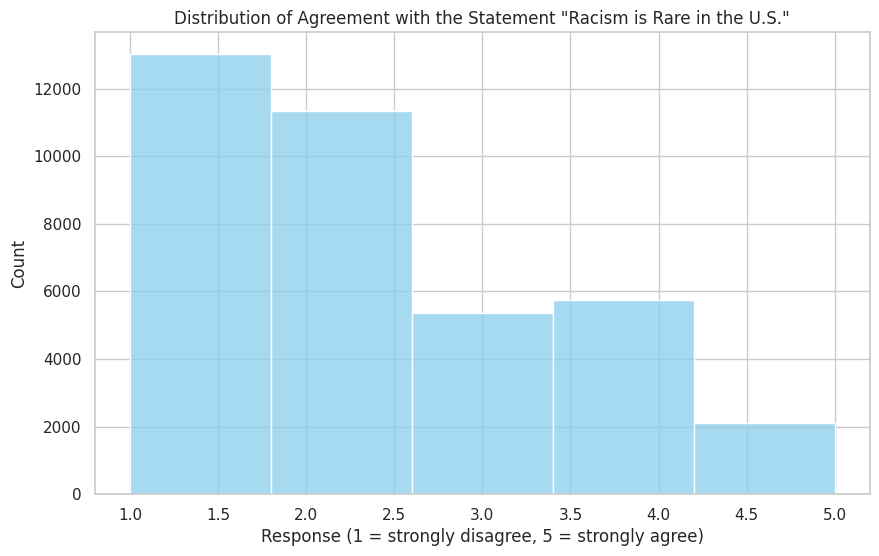

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['racerare'].dropna(), bins=5, kde=False, color='skyblue')
plt.title('Distribution of Agreement with the Statement "Racism is Rare in the U.S."')
plt.xlabel('Response (1 = strongly disagree, 5 = strongly agree)')
plt.ylabel('Count')
plt.show()

## Perception of White Advantage: Distribution of Agreement Levels

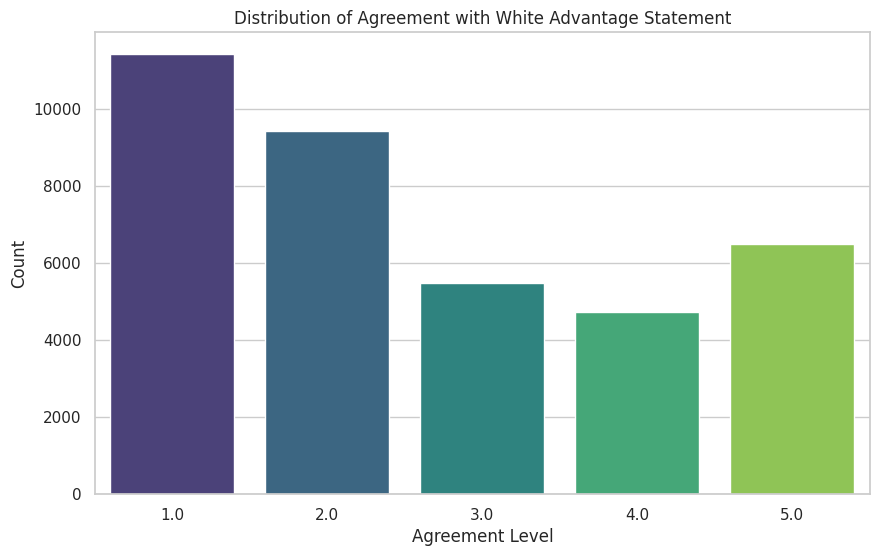

In [13]:
df_whiteadv = df.dropna(subset=['whiteadv'])

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='whiteadv', data=df_whiteadv, palette="viridis")

plt.xlabel('Agreement Level')
plt.ylabel('Count')
plt.title('Distribution of Agreement with White Advantage Statement')
plt.show()